In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report,confusion_matrix

#Import data

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/Thesis_Spring2023/Online_Survey_about_Insomnia.csv')

In [ ]:
data.head(10)

,Timestamp,Age,Gender,Time_after_lights,Awakenings_night,awakening_earlier,sleep_duration,quality_of_sleep,well-being,Functioning,...,smoke,alcohol,tea_coffee,activity,extracurricular_activities,addicted_games,use_phone_beforeSleep,study_work_pressure,illness,medication
0,3/2/2023 12:29,21,Female,1: Slightly delayed,1: Minor problem,1: A little earlier,1: Slightly insufficient,1: Slightly unsatisfactory,1: Slightly decreased,2: Markedly decreased,...,No,No,Yes,Somewhat active,No,No,Yes,Severe,No,No
1,4/10/2023 13:12,32,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,1: Slightly decreased,0: Normal,...,No,No,Yes,Somewhat active,No,No,Yes,Mild,No,No
2,4/10/2023 21:22,21,Female,1: Slightly delayed,0: No problem,0: Not earlier,1: Slightly insufficient,0: Satisfactory,0: Normal,0: Normal,...,No,No,Yes,Very Active,Yes,No,No,No pressure,No,No
3,4/10/2023 21:53,20,Male,1: Slightly delayed,0: No problem,0: Not earlier,1: Slightly insufficient,0: Satisfactory,1: Slightly decreased,1: Slightly decreased,...,No,No,Yes,Somewhat active,No,Yes,Yes,No pressure,Yes,No
4,4/10/2023 22:07,23,Male,2: Markedly delayed,2: Considerable problem,2: Markedly earlier,2: Markedly insufficient,3: Very unsatisfactory or did not sleep at all,1: Slightly decreased,1: Slightly decreased,...,No,No,Yes,Somewhat active,No,No,Yes,Moderate,No,No
5,4/10/2023 22:07,22,Male,2: Markedly delayed,2: Considerable problem,2: Markedly earlier,1: Slightly insufficient,2: Markedly unsatisfactory,1: Slightly decreased,2: Markedly decreased,...,Yes,Yes,Yes,Somewhat active,Yes,No,Yes,Moderate,No,No
6,4/10/2023 22:11,23,Female,2: Markedly delayed,2: Considerable problem,1: A little earlier,2: Markedly insufficient,3: Very unsatisfactory or did not sleep at all,3: Very decreased,2: Markedly decreased,...,No,No,Yes,Somewhat active,No,No,Yes,No pressure,No,Yes
7,4/10/2023 22:11,26,Male,2: Markedly delayed,2: Considerable problem,1: A little earlier,0: Sufficient,1: Slightly unsatisfactory,0: Normal,0: Normal,...,No,No,Yes,Inactive,No,No,Yes,Moderate,No,No
8,4/10/2023 22:24,20,Male,1: Slightly delayed,2: Considerable problem,0: Not earlier,1: Slightly insufficient,1: Slightly unsatisfactory,1: Slightly decreased,0: Normal,...,No,No,Yes,Somewhat active,Yes,No,Yes,Mild,No,No
9,4/10/2023 22:33,23,Male,1: Slightly delayed,1: Minor problem,1: A little earlier,1: Slightly insufficient,1: Slightly unsatisfactory,0: Normal,0: Normal,...,No,No,Yes,Active,No,No,Yes,No pressure,No,No


In [ ]:
data.shape

(729, 27)

In [ ]:
data.describe()

,Age
count,729.000000
mean,24.031550
std,20.962561
min,8.000000
25%,21.000000
50%,22.000000
75%,23.000000
max,560.000000


In [ ]:
data.isnull().sum()

Timestamp                     0
Age                           0
Gender                        0
Time_after_lights             0
Awakenings_night              0
awakening_earlier             0
sleep_duration                0
quality_of_sleep              0
well-being                    0
Functioning                   0
Sleepiness                    0
marital_status                0
hours_sleep                   0
nap                           0
pressure/ stress              0
depressed                     0
relationship_problem          0
smoke                         0
alcohol                       0
tea_coffee                    0
activity                      0
extracurricular_activities    0
addicted_games                0
use_phone_beforeSleep         0
study_work_pressure           0
illness                       0
medication                    0
dtype: int64

In [ ]:
# Removing column
list_drop = ['Timestamp']
data.drop(list_drop, axis=1, inplace=True)

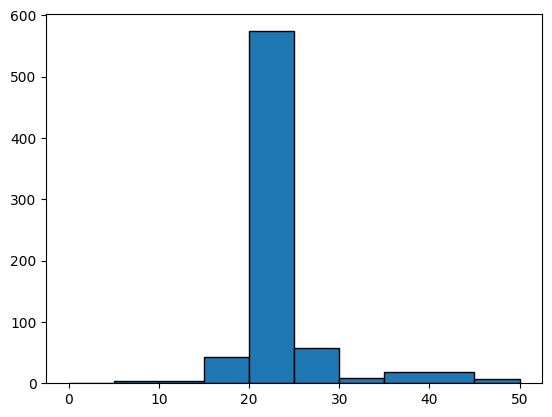

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['Age'], bins=[0,5,10,15,20,25,30,35,45,50], edgecolor='black')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         729 non-null    int64 
 1   Gender                      729 non-null    object
 2   Time_after_lights           729 non-null    object
 3   Awakenings_night            729 non-null    object
 4   awakening_earlier           729 non-null    object
 5   sleep_duration              729 non-null    object
 6   quality_of_sleep            729 non-null    object
 7   well-being                  729 non-null    object
 8   Functioning                 729 non-null    object
 9   Sleepiness                  729 non-null    object
 10  marital_status              729 non-null    object
 11  hours_sleep                 729 non-null    object
 12  nap                         729 non-null    object
 13  pressure/ stress            729 non-null    object

In [ ]:
print(data['Gender'].value_counts()) # This is what you will use

Male      496
Female    233
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

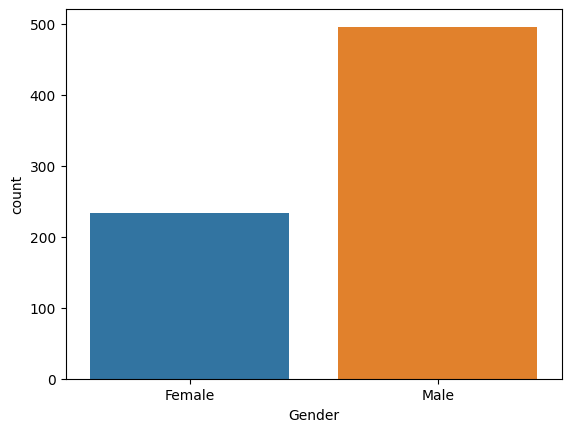

In [ ]:
import seaborn as sns
sns.countplot(x='Gender', data=data)

#Label Encode

In [ ]:
#gender
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data[['Gender']]=data[['Gender']].apply(LabelEncoder().fit_transform)

In [ ]:
#Time it takes you to fall asleep after turning-off the lights
lb=LabelEncoder()
data[['Time_after_lights']]=data[['Time_after_lights']].apply(LabelEncoder().fit_transform)

In [ ]:
#Awakenings during the night
lb=LabelEncoder()
data[['Awakenings_night']]=data[['Awakenings_night']].apply(LabelEncoder().fit_transform)

In [ ]:
#Final awakening earlier than desired
lb=LabelEncoder()
data[['awakening_earlier']]=data[['awakening_earlier']].apply(LabelEncoder().fit_transform)

In [ ]:
#Total sleep duration
lb=LabelEncoder()
data[['sleep_duration']]=data[['sleep_duration']].apply(LabelEncoder().fit_transform)

In [ ]:
#Overall quality of sleep
lb=LabelEncoder()
data[['quality_of_sleep']]=data[['quality_of_sleep']].apply(LabelEncoder().fit_transform)

In [ ]:
#Sense of well-being during the day
lb=LabelEncoder()
data[['well-being']]=data[['well-being']].apply(LabelEncoder().fit_transform)

In [ ]:
#Functioning (physical and mental) during the day
lb=LabelEncoder()
data[['Functioning']]=data[['Functioning']].apply(LabelEncoder().fit_transform)

In [ ]:
#Sleepiness during the day
lb=LabelEncoder()
data[['Sleepiness']]=data[['Sleepiness']].apply(LabelEncoder().fit_transform)

In [ ]:
#marital status
lb=LabelEncoder()
data[['marital_status']]=data[['marital_status']].apply(LabelEncoder().fit_transform)

In [ ]:
#How many hours of sleep do you typically get at each night?
lb=LabelEncoder()
data[['hours_sleep']]=data[['hours_sleep']].apply(LabelEncoder().fit_transform)

In [ ]:
#Do you takes nap in the noon/afternoon?
lb=LabelEncoder()
data[['nap']]=data[['nap']].apply(LabelEncoder().fit_transform)

In [ ]:
#Do you feel any mental pressure/ stress or suffer from any anxiety recently?
lb=LabelEncoder()
data[['pressure/ stress ']]=data[['pressure/ stress ']].apply(LabelEncoder().fit_transform)

In [ ]:
#Do you feel depressed recently?lb=LabelEncoder()
data[['depressed']]=data[['depressed']].apply(LabelEncoder().fit_transform)

In [ ]:
#Are you facing any romantic relationship problems?
lb=LabelEncoder()
data[['relationship_problem']]=data[['relationship_problem']].apply(LabelEncoder().fit_transform)

In [ ]:
#Do you smoke?
lb=LabelEncoder()
data[['smoke']]=data[['smoke']].apply(LabelEncoder().fit_transform)

In [ ]:
#Do you consume alcohol?
lb=LabelEncoder()
data[['alcohol']]=data[['alcohol']].apply(LabelEncoder().fit_transform)

In [ ]:
#Do you drink tea or coffee?
lb=LabelEncoder()
data[['tea_coffee']]=data[['tea_coffee']].apply(LabelEncoder().fit_transform)

In [ ]:
#Your  physical activity level
lb=LabelEncoder()
data[['activity']]=data[['activity']].apply(LabelEncoder().fit_transform)

In [ ]:
#Do you participate in any extracurricular activities?
lb=LabelEncoder()
data[['extracurricular_activities']]=data[['extracurricular_activities']].apply(LabelEncoder().fit_transform)

In [ ]:
#Are you addicted to online/ offline video games?
lb=LabelEncoder()
data[['addicted_games']]=data[['addicted_games']].apply(LabelEncoder().fit_transform)

In [ ]:
#Do you use your mobile phone before sleeping?
lb=LabelEncoder()
data[['use_phone_beforeSleep']]=data[['use_phone_beforeSleep']].apply(LabelEncoder().fit_transform)

In [ ]:
#Your recent study/ work pressure
lb=LabelEncoder()
data[['study_work_pressure']]=data[['study_work_pressure']].apply(LabelEncoder().fit_transform)

In [ ]:
#Are you suffering from any serious illness
lb=LabelEncoder()
data[['illness']]=data[['illness']].apply(LabelEncoder().fit_transform)

In [ ]:
#Are you currently taking any medication?
lb=LabelEncoder()
data[['medication']]=data[['medication']].apply(LabelEncoder().fit_transform)

#Calculate the ais score and find out insomnia(insomnia>=6)

In [ ]:
column_names = ['Time_after_lights', 'Awakenings_night', 'awakening_earlier', 'sleep_duration','quality_of_sleep','well-being','Functioning','Sleepiness']
data['ais_score']= data[column_names].sum(axis=1)

In [ ]:
 insomnia=[]
 for row in data['ais_score']:
   if row < 6.0 :    insomnia.append('No')
   else:insomnia.append('Yes')

In [ ]:
data['insomnia']=insomnia

In [ ]:
print(data['insomnia'].value_counts()) # This is what you will use

Yes    378
No     351
Name: insomnia, dtype: int64


<Axes: xlabel='insomnia', ylabel='count'>

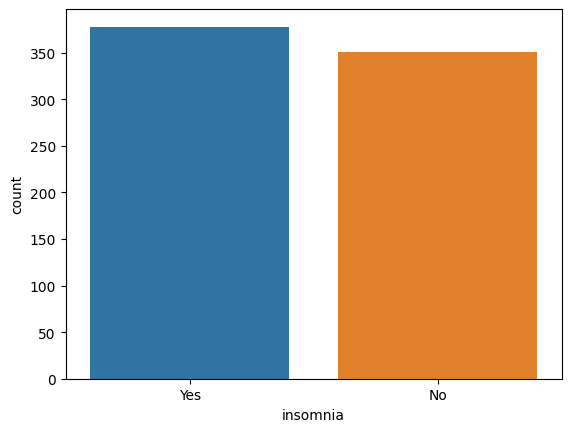

In [ ]:
import seaborn as sns
sns.countplot(x='insomnia', data=data)

In [ ]:
data.head(10)

,Age,Gender,Time_after_lights,Awakenings_night,awakening_earlier,sleep_duration,quality_of_sleep,well-being,Functioning,Sleepiness,...,tea_coffee,activity,extracurricular_activities,addicted_games,use_phone_beforeSleep,study_work_pressure,illness,medication,ais_score,insomnia
0,21,0,1,1,1,1,1,1,2,0,...,1,2,0,0,1,3,0,0,8,Yes
1,32,1,1,0,0,0,0,1,0,1,...,1,2,0,0,1,0,0,0,3,No
2,21,0,1,0,0,1,0,0,0,0,...,1,3,1,0,0,2,0,0,2,No
3,20,1,1,0,0,1,0,1,1,0,...,1,2,0,1,1,2,1,0,4,No
4,23,1,2,2,2,2,3,1,1,2,...,1,2,0,0,1,1,0,0,15,Yes
5,22,1,2,2,2,1,2,1,2,1,...,1,2,1,0,1,1,0,0,13,Yes
6,23,0,2,2,1,2,3,3,2,3,...,1,2,0,0,1,2,0,1,18,Yes
7,26,1,2,2,1,0,1,0,0,0,...,1,1,0,0,1,1,0,0,6,Yes
8,20,1,1,2,0,1,1,1,0,3,...,1,2,1,0,1,0,0,0,9,Yes
9,23,1,1,1,1,1,1,0,0,0,...,1,0,0,0,1,2,0,0,5,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data[['insomnia']]=data[['insomnia']].apply(LabelEncoder().fit_transform)

In [ ]:
data.head(10)

,Age,Gender,Time_after_lights,Awakenings_night,awakening_earlier,sleep_duration,quality_of_sleep,well-being,Functioning,Sleepiness,...,tea_coffee,activity,extracurricular_activities,addicted_games,use_phone_beforeSleep,study_work_pressure,illness,medication,ais_score,insomnia
0,21,0,1,1,1,1,1,1,2,0,...,1,2,0,0,1,3,0,0,8,1
1,32,1,1,0,0,0,0,1,0,1,...,1,2,0,0,1,0,0,0,3,0
2,21,0,1,0,0,1,0,0,0,0,...,1,3,1,0,0,2,0,0,2,0
3,20,1,1,0,0,1,0,1,1,0,...,1,2,0,1,1,2,1,0,4,0
4,23,1,2,2,2,2,3,1,1,2,...,1,2,0,0,1,1,0,0,15,1
5,22,1,2,2,2,1,2,1,2,1,...,1,2,1,0,1,1,0,0,13,1
6,23,0,2,2,1,2,3,3,2,3,...,1,2,0,0,1,2,0,1,18,1
7,26,1,2,2,1,0,1,0,0,0,...,1,1,0,0,1,1,0,0,6,1
8,20,1,1,2,0,1,1,1,0,3,...,1,2,1,0,1,0,0,0,9,1
9,23,1,1,1,1,1,1,0,0,0,...,1,0,0,0,1,2,0,0,5,0


In [ ]:
# Removing column
list_drop = ['ais_score']
data.drop(list_drop, axis=1, inplace=True)

In [ ]:
data.head(10)

,Age,Gender,Time_after_lights,Awakenings_night,awakening_earlier,sleep_duration,quality_of_sleep,well-being,Functioning,Sleepiness,...,alcohol,tea_coffee,activity,extracurricular_activities,addicted_games,use_phone_beforeSleep,study_work_pressure,illness,medication,insomnia
0,21,0,1,1,1,1,1,1,2,0,...,0,1,2,0,0,1,3,0,0,1
1,32,1,1,0,0,0,0,1,0,1,...,0,1,2,0,0,1,0,0,0,0
2,21,0,1,0,0,1,0,0,0,0,...,0,1,3,1,0,0,2,0,0,0
3,20,1,1,0,0,1,0,1,1,0,...,0,1,2,0,1,1,2,1,0,0
4,23,1,2,2,2,2,3,1,1,2,...,0,1,2,0,0,1,1,0,0,1
5,22,1,2,2,2,1,2,1,2,1,...,1,1,2,1,0,1,1,0,0,1
6,23,0,2,2,1,2,3,3,2,3,...,0,1,2,0,0,1,2,0,1,1
7,26,1,2,2,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
8,20,1,1,2,0,1,1,1,0,3,...,0,1,2,1,0,1,0,0,0,1
9,23,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,1,2,0,0,0


In [ ]:
X = data.iloc[:,0:26]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [ ]:
X.head()

,Age,Gender,Time_after_lights,Awakenings_night,awakening_earlier,sleep_duration,quality_of_sleep,well-being,Functioning,Sleepiness,...,smoke,alcohol,tea_coffee,activity,extracurricular_activities,addicted_games,use_phone_beforeSleep,study_work_pressure,illness,medication
0,21,0,1,1,1,1,1,1,2,0,...,0,0,1,2,0,0,1,3,0,0
1,32,1,1,0,0,0,0,1,0,1,...,0,0,1,2,0,0,1,0,0,0
2,21,0,1,0,0,1,0,0,0,0,...,0,0,1,3,1,0,0,2,0,0
3,20,1,1,0,0,1,0,1,1,0,...,0,0,1,2,0,1,1,2,1,0
4,23,1,2,2,2,2,3,1,1,2,...,0,0,1,2,0,0,1,1,0,0


In [ ]:
y.head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    0
Name: insomnia, dtype: int64

# Split the dataset into a training and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Standardize the features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

Train the classifier on the training data

In [ ]:
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Make predictions on the test data

In [ ]:
y_pred = clf.predict(X_test)

Evaluate the classifier

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

 Print the results

In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9315068493150684
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        99
           1       0.95      0.93      0.94       120

    accuracy                           0.93       219
   macro avg       0.93      0.93      0.93       219
weighted avg       0.93      0.93      0.93       219



#apply MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras

Build an MLP model

In [ ]:
# Build an MLP model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Train the model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/50
13/13 - 1s - loss: 0.6447 - accuracy: 0.6569 - val_loss: 0.5441 - val_accuracy: 0.7941 - 986ms/epoch - 76ms/step
Epoch 2/50
13/13 - 0s - loss: 0.4978 - accuracy: 0.8407 - val_loss: 0.4316 - val_accuracy: 0.8431 - 57ms/epoch - 4ms/step
Epoch 3/50
13/13 - 0s - loss: 0.3870 - accuracy: 0.8824 - val_loss: 0.3511 - val_accuracy: 0.8725 - 57ms/epoch - 4ms/step
Epoch 4/50
13/13 - 0s - loss: 0.3036 - accuracy: 0.9044 - val_loss: 0.2916 - val_accuracy: 0.8725 - 66ms/epoch - 5ms/step
Epoch 5/50
13/13 - 0s - loss: 0.2417 - accuracy: 0.9142 - val_loss: 0.2502 - val_accuracy: 0.9020 - 75ms/epoch - 6ms/step
Epoch 6/50
13/13 - 0s - loss: 0.1976 - accuracy: 0.9461 - val_loss: 0.2203 - val_accuracy: 0.9020 - 71ms/epoch - 5ms/step
Epoch 7/50
13/13 - 0s - loss: 0.1637 - accuracy: 0.9534 - val_loss: 0.2012 - val_accuracy: 0.9118 - 57ms/epoch - 4ms/step
Epoch 8/50
13/13 - 0s - loss: 0.1373 - accuracy: 0.9608 - val_loss: 0.1835 - val_accuracy: 0.9216 - 70ms/epoch - 5ms/step
Epoch 9/50
13/13 - 0s 

Evaluate the model on the test data

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)


7/7 [==============================] - 0s 2ms/step


Calculate accuracy and print the classification report


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

Print the results

In [ ]:

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9680365296803652
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        99
           1       0.97      0.97      0.97       120

    accuracy                           0.97       219
   macro avg       0.97      0.97      0.97       219
weighted avg       0.97      0.97      0.97       219



#DecisionTreeClassifier

**Create a Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

**Train the classifier on the training data**

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Make predictions on the test data**

In [ ]:
y_pred = clf.predict(X_test)

 **Evaluate the classifier**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

**Print the results**

In [ ]:

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8584474885844748
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        99
           1       0.87      0.88      0.87       120

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



#AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create a base Decision Tree Classifier (you can customize this classifier)
base_classifier = DecisionTreeClassifier(max_depth=1)

In [ ]:
# Create an AdaBoost Classifier using the base classifier
clf = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)


In [ ]:
# Train the classifier on the training data
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [ ]:
# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9908675799086758
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.98      0.99       120

    accuracy                           0.99       219
   macro avg       0.99      0.99      0.99       219
weighted avg       0.99      0.99      0.99       219



#logistric

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression classifier
clf = LogisticRegression(random_state=42)

In [ ]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9908675799086758
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        99
           1       0.98      1.00      0.99       120

    accuracy                           0.99       219
   macro avg       0.99      0.99      0.99       219
weighted avg       0.99      0.99      0.99       219



#Naive Bayes classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes classifier (Gaussian Naive Bayes for real-valued features)
clf = GaussianNB()

In [ ]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [ ]:
# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.91324200913242
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        99
           1       0.93      0.91      0.92       120

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219



#Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


In [ ]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.954337899543379
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        99
           1       0.96      0.96      0.96       120

    accuracy                           0.95       219
   macro avg       0.95      0.95      0.95       219
weighted avg       0.95      0.95      0.95       219

